#### Carregando as importações

In [1]:
import import_ipynb
from imports.imports_common import *
from imports.imports_common_models_DL import *
from imports.imports_common_metrics import *

importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_models_DL.ipynb


c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_metrics.ipynb


In [2]:
# Carrega as imagens e divide automaticamente em treino, teste e validação
train_dataset = image_dataset_from_directory(
    path,
    validation_split = VAL_SPLIT + TEST_SPLIT,  # Define a proporção para validação + teste
    subset='training',  # Define o conjunto como treinamento
    seed = SEED,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    color_mode = COLOR_MODE_RGB,
    label_mode = 'categorical',
)

validation_dataset = image_dataset_from_directory(
    path,
    validation_split = VAL_SPLIT + TEST_SPLIT,  # Define a proporção para validação + teste
    subset='validation',  # Define o conjunto como validação
    seed = SEED,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    color_mode = COLOR_MODE_RGB,
    label_mode = 'categorical',
)

test_dataset = image_dataset_from_directory(
    path,
    validation_split = VAL_SPLIT + TEST_SPLIT,  # Define a proporção para validação + teste
    subset='validation',  # Define o conjunto como teste
    seed = SEED,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    color_mode = COLOR_MODE_RGB,
    label_mode = 'categorical',
)

Found 6400 files belonging to 4 classes.
Using 4480 files for training.
Found 6400 files belonging to 4 classes.
Using 1920 files for validation.
Found 6400 files belonging to 4 classes.
Using 1920 files for validation.


Epoch 1/30
140/140 [==============================] - 106s 726ms/step - loss: 3.9822 - accuracy: 0.5069 - val_loss: 0.9549 - val_accuracy: 0.5656
Epoch 2/30
140/140 [==============================] - 104s 744ms/step - loss: 0.8367 - accuracy: 0.6150 - val_loss: 0.8243 - val_accuracy: 0.6203
Epoch 3/30
140/140 [==============================] - 105s 752ms/step - loss: 0.7083 - accuracy: 0.6884 - val_loss: 0.7138 - val_accuracy: 0.6995
Epoch 4/30
140/140 [==============================] - 103s 730ms/step - loss: 0.5851 - accuracy: 0.7556 - val_loss: 0.6078 - val_accuracy: 0.7427
Epoch 5/30
140/140 [==============================] - 103s 731ms/step - loss: 0.5134 - accuracy: 0.7864 - val_loss: 0.5393 - val_accuracy: 0.7667
Epoch 6/30
140/140 [==============================] - 108s 771ms/step - loss: 0.3802 - accuracy: 0.8482 - val_loss: 0.4956 - val_accuracy: 0.7964
Epoch 7/30
140/140 [==============================] - 127s 904ms/step - loss: 0.2933 - accuracy: 0.8864 - val_loss: 0.4389 -

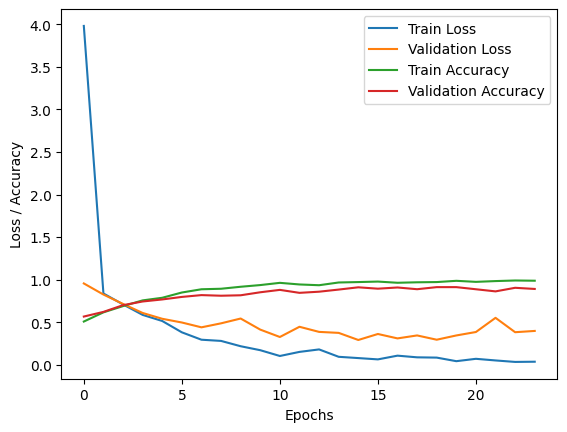

60/60 [==============================] - 14s 221ms/step - loss: 0.2933 - accuracy: 0.9115
Test Loss: 0.2932937443256378
Test Accuracy: 0.9114583134651184
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None

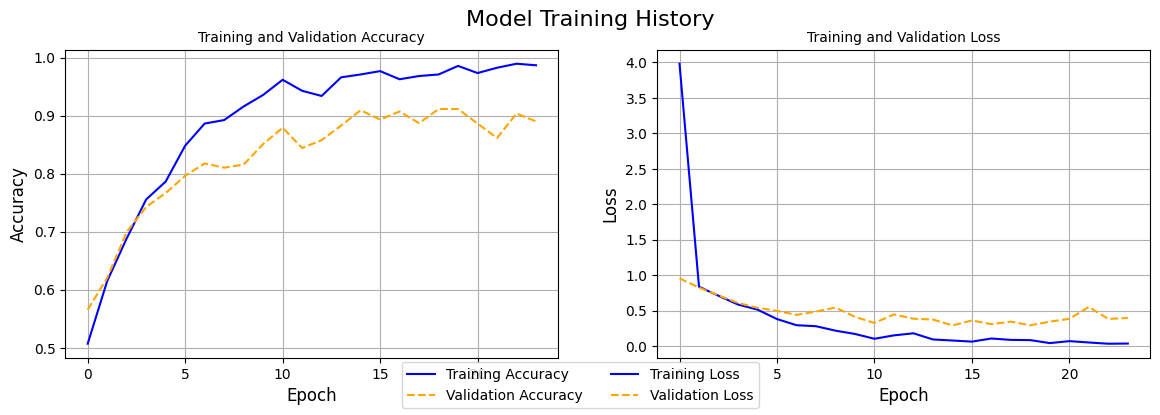

In [3]:
# Cria modelo
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (2,2), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics='accuracy')

#Train the Convolutional Neural Network on the data
history = model.fit(train_dataset, epochs = EPOCHS, validation_data = validation_dataset,  callbacks=[early_stop])

# Plota os gráficos de perda e acurácia
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

# Avalia o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_dataset)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

model.summary()

# Extract metrics from history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Plot accuracy metrics
ax1.plot(acc, label='Training Accuracy', color='blue', linestyle='solid')
ax1.plot(val_acc, label='Validation Accuracy', color='orange', linestyle='dashed')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Training and Validation Accuracy', fontsize=10)
ax1.grid()

# Plot loss metrics
ax2.plot(loss, label='Training Loss', color='blue', linestyle='solid')
ax2.plot(val_loss, label='Validation Loss', color='orange', linestyle='dashed')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_title('Training and Validation Loss', fontsize=10)
ax2.grid()

# Add legend and title to figure
fig.legend(loc='lower center', ncol=2, fontsize=10)
fig.suptitle('Model Training History', fontsize=16)

# Show the plot
plt.show()